### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [4]:
df = pd.read_csv('Default_Fin.csv')

#### Descriptive Analysis

In [6]:
df.head(10)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
5,6,0,11035.08,89898.72,0
6,7,1,9906.12,298862.76,0
7,8,0,9704.04,211205.40,0
8,9,1,13932.72,449622.36,0
9,10,1,0.00,351303.24,0


In [7]:
df.shape  #Number of rows and columns

(10000, 5)

In [10]:
df.dtypes

Index              int64
Employed           int64
Bank Balance     float64
Annual Salary    float64
Defaulted?         int64
dtype: object

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Employed,10000.0,0.705600,0.455795,0.00,0.00,1.00,1.00,1.00
Bank Balance,10000.0,10024.498524,5804.579486,0.00,5780.79,9883.62,13995.66,31851.84
Annual Salary,10000.0,402203.782224,160039.674988,9263.64,256085.52,414631.74,525692.76,882650.76
Defaulted,10000.0,0.033300,0.179428,0.00,0.00,0.00,0.00,1.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


#### Data Pre Processing

In [11]:
df.isnull().sum() #There are no missing values in the dataset. 

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

#### Feature Selection 

In [12]:
df.drop('Index',axis = 1,inplace=True) # Dropping unwanted columns

In [13]:
df.rename(columns={'Defaulted?': "Defaulted"}, inplace=True)

In [14]:
df.head(2)

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0


In [ ]:
# People who did not default on their loan is 0 and those that did default is 1. 

#### Relationship between the variables

<Axes: xlabel='Defaulted', ylabel='Annual Salary'>

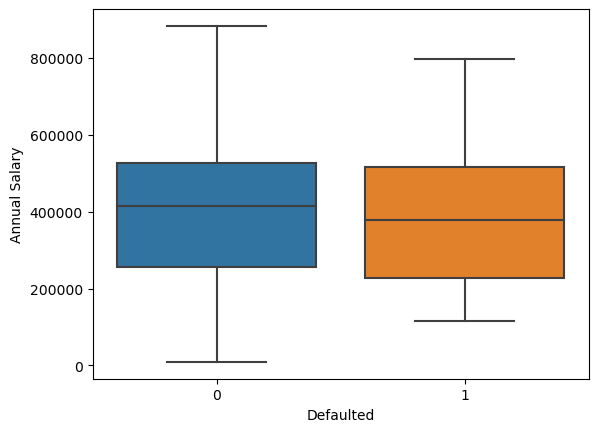

In [17]:
sns.boxplot(x='Defaulted',y='Annual Salary',data = df)

<Axes: xlabel='Defaulted', ylabel='Bank Balance'>

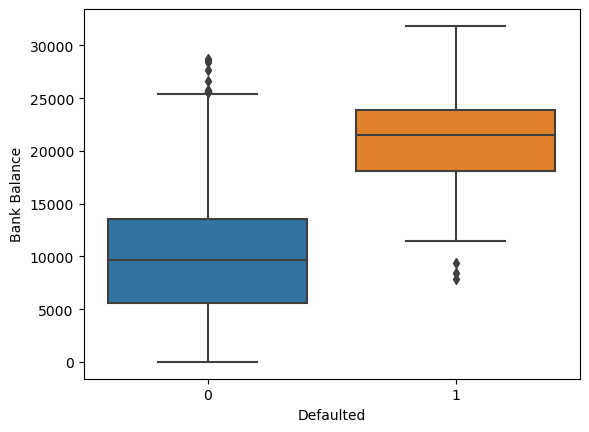

In [18]:
sns.boxplot(x='Defaulted',y='Bank Balance',data = df)

<Axes: xlabel='Employed', ylabel='Defaulted'>

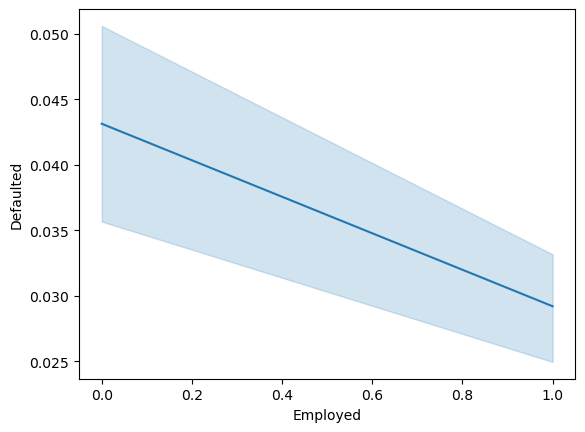

In [21]:
sns.lineplot(x='Employed', y='Defaulted', data=df)

<Axes: xlabel='Annual Salary', ylabel='Defaulted'>

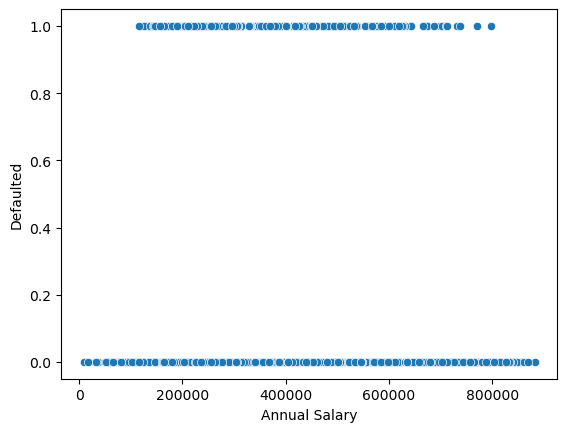

In [28]:
sns.scatterplot(x='Annual Salary', y='Defaulted', data=df)

<Axes: xlabel='Bank Balance', ylabel='Defaulted'>

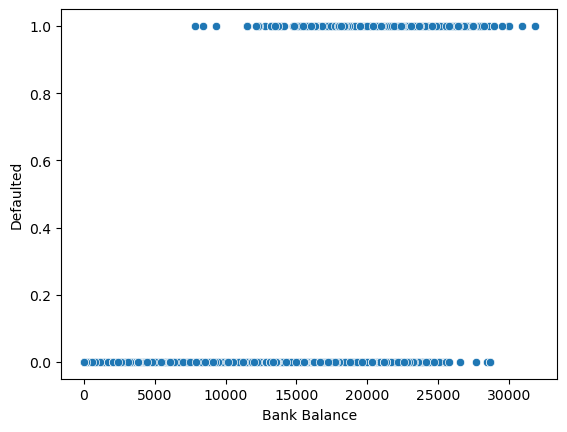

In [29]:
sns.scatterplot(x='Bank Balance', y='Defaulted', data=df)

#### Train Test Split 

In [30]:
x = df.drop(columns='Defaulted')
y = df['Defaulted']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=100)

In [31]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(7000, 3) (7000,) (3000, 3) (3000,)


#### Train and Evaluate the Model

In [32]:
model = LogisticRegression() # Create the Model
model.fit(xtrain, ytrain) # Fit the Model

LogisticRegression()

In [33]:
model.predict(xtest)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
model.score(xtest, ytest) #  Logistic Regression model is able to correctly predict(96%) of the labels in the test set.

0.969

In [35]:
confusion_matrix(ytest, model.predict(xtest))  

#The array that shows how many instances the model predicted correctly or incorrectly as either Yes or No.

array([[2907,    2],
       [  91,    0]], dtype=int64)

#### Interpret the Model

In [36]:
model.intercept_

array([-7.77283293e-09])

In [37]:
model.coef_  # model coefficients (beta1 and beta2)

array([[ 2.27973666e-09,  4.00052600e-05, -1.05615464e-05]])

In [38]:
log_odds = np.round(model.coef_[0], 2)
log_odds

# Converting the coefficients from a two-dimenionsal array to a one-dimensional array and rounding the values to two decimal places.

array([ 0.,  0., -0.])

In [39]:
pd.DataFrame({'log odds': log_odds}, index = x.columns)

,log odds
Employed,0.0
Bank Balance,0.0
Annual Salary,-0.0


In [41]:
odds = np.round(np.exp(log_odds), 2)
pd.DataFrame({'odds': odds}, index = x.columns)

,odds
Employed,1.0
Bank Balance,1.0
Annual Salary,1.0
